# Handle All requirments

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras.models import Model
from keras.preprocessing import image

# Get MNIST Dataset

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(f"train data: {x_train.shape}")
print(f"test data: {x_test.shape}")

train data: (60000, 28, 28)
test data: (10000, 28, 28)


# Preprocess the data

In [4]:
def preprocess_data(data):
    data = data.astype('float32') / 255.0
    data = data.reshape(-1, 784)
    return data


x_train = preprocess_data(x_train)
x_test = preprocess_data(x_test)

print(f"train data: {x_train.shape}")
print(f"test data: {x_test.shape}")

train data: (60000, 784)
test data: (10000, 784)


# Show data

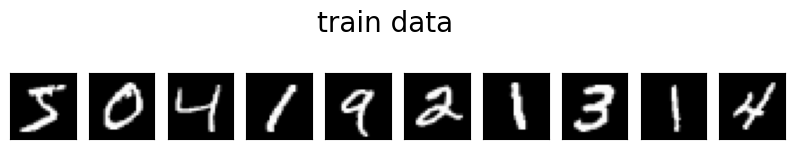

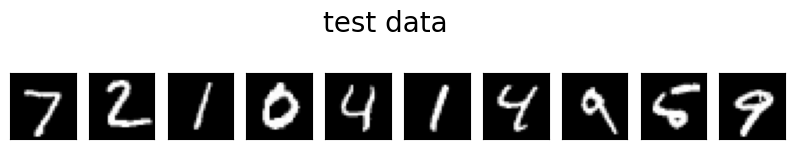

In [5]:
def show_data(data, num=10, height=28, width=28, title=""):
    plt.figure(figsize=(10, 2))
    plt.suptitle(title, fontsize=20)
    for i in range(num):
        ax = plt.subplot(1, num, i + 1)
        plt.imshow(data[i].reshape(height, width))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

show_data(x_train, title='train data')
show_data(x_test, title='test data')

# Build Autoencoder

In [6]:
input_dim, output_dim = 784, 784
encoder_dim = 100
hidden_dim = 256

In [7]:
# Encoder
input_layer = Input(shape=(input_dim,), name='input_layer')
hidden_layer_1 = Dense(hidden_dim, activation='relu', name='hidden_layer_1')(input_layer)

# Encode Layer
encode_layer = Dense(encoder_dim, activation='relu', name='encode_layer')(hidden_layer_1)

# Decoder
hidden_layer_2 = Dense(hidden_dim, activation='relu', name='hidden_layer_2')(encode_layer)
output_layer = Dense(output_dim, activation='sigmoid', name='output_layer')(hidden_layer_2)

In [8]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 784)]             0         
                                                                 
 hidden_layer_1 (Dense)      (None, 256)               200960    
                                                                 
 encode_layer (Dense)        (None, 100)               25700     
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               25856     
                                                                 
 output_layer (Dense)        (None, 784)               201488    
                                                                 
Total params: 454004 (1.73 MB)
Trainable params: 454004 (1.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
autoencoder.fit(x_train, x_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1140
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0811
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0765
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0741
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0727
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0717
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0710
Epoch 8/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0706
Epoch 9/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0702
Epoch 10/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0699
Epoch 11/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0696
Epoch 12/20
1875/1875 [==============================] - 11s 6ms/step - lo

# Get the decoded (reconstucted) data

In [10]:
decoded_data = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


# Make a model to get the encoded representation

In [11]:
print(autoencoder.input)
print(autoencoder.get_layer('encode_layer').output)
get_encoded_data = Model(autoencoder.input, autoencoder.get_layer('encode_layer').output)

KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='input_layer'), name='input_layer', description="created by layer 'input_layer'")
KerasTensor(type_spec=TensorSpec(shape=(None, 100), dtype=tf.float32, name=None), name='encode_layer/Relu:0', description="created by layer 'encode_layer'")


In [12]:
encoded_data = get_encoded_data.predict(x_test)

313/313 [==============================] - 1s 2ms/step


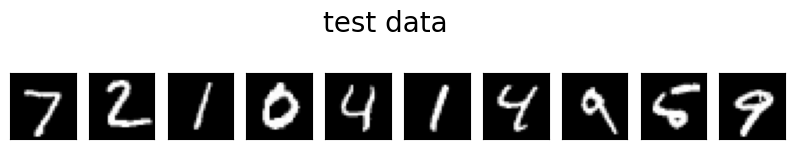

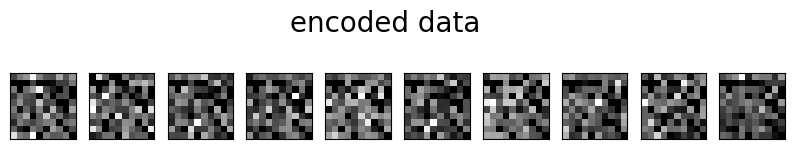

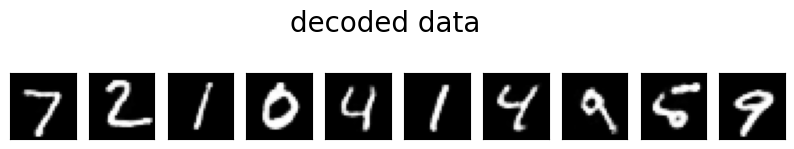

In [13]:
show_data(x_test, title='test data')
show_data(encoded_data, height=10, width = 10, title='encoded data')
show_data(decoded_data, title='decoded data')